In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import collections

%matplotlib inline

In [0]:
# Set parameters for plot size and dataframes
rcParams['figure.figsize'] = 20,14
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

In [52]:
# load the data from dropbox
y2015 = pd.read_csv(
    'https://www.dropbox.com/s/0so14yudedjmm5m/LoanStats3d.csv?dl=1',
    skipinitialspace=True,
    header=1
)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
# brief look at the data
y2015.head()

id   member_id  ...  total_bc_limit  total_il_high_credit_limit
0  68009401  72868139.0  ...        281300.0                     13400.0
1  68354783  73244544.0  ...         12500.0                     75635.0
2  68466916  73356753.0  ...         38400.0                     82117.0
3  68466961  73356799.0  ...         41500.0                     42503.0
4  68495092  73384866.0  ...          2750.0                     18248.0

[5 rows x 111 columns]

In [54]:
# Look at all of the objects which are typed as a object as considered categorical
categorical = y2015.select_dtypes(include=['object'])
categorical.head()

id        term  ... application_type verification_status_joint
0  68009401   60 months  ...       INDIVIDUAL                       NaN
1  68354783   36 months  ...       INDIVIDUAL                       NaN
2  68466916   36 months  ...       INDIVIDUAL                       NaN
3  68466961   36 months  ...       INDIVIDUAL                       NaN
4  68495092   36 months  ...       INDIVIDUAL                       NaN

[5 rows x 26 columns]

In [0]:
# count the occurances of unique values in the categorical dataframe and put them in a dictionary 
cat_count = {}

for i in categorical:
  column = categorical
  cat_count[i] = column.nunique()

In [56]:
cat_count

{'addr_state': id                           421097
 term                              2
 int_rate                        110
 grade                             7
 sub_grade                        35
 emp_title                    120812
 emp_length                       11
 home_ownership                    4
 verification_status               3
 issue_d                          12
 loan_status                       7
 pymnt_plan                        1
 url                          421095
 desc                             34
 purpose                          14
 title                            27
 zip_code                        914
 addr_state                       49
 earliest_cr_line                668
 revol_util                     1211
 initial_list_status               2
 last_pymnt_d                     25
 next_pymnt_d                      4
 last_credit_pull_d               26
 application_type                  2
 verification_status_joint         3
 dtype: int64, 'applicat

In [0]:
# convert ID and interest rate to numeric 
y2015['id'] = pd.to_numeric(y2015['id'], errors = 'coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
           'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

# remove two summary rows at the end that don't actually contain any data
y2015 = y2015[:-2]

In [0]:
# Initialize the model, select the target and the features

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
y = y2015['loan_status']

# separate the categorical data into dummy variables
X = pd.get_dummies(X)
# Remove the columns with nan
X = X.dropna(axis=1)

In [62]:
# run model with all the data
score = cross_val_score(rfc, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [64]:
print(score)
print(score.mean())

[0.98021895 0.98078887 0.9813113  0.98162    0.97102826 0.97829494
 0.91939965 0.98071671 0.98000332 0.97981285]
0.9733194857246238


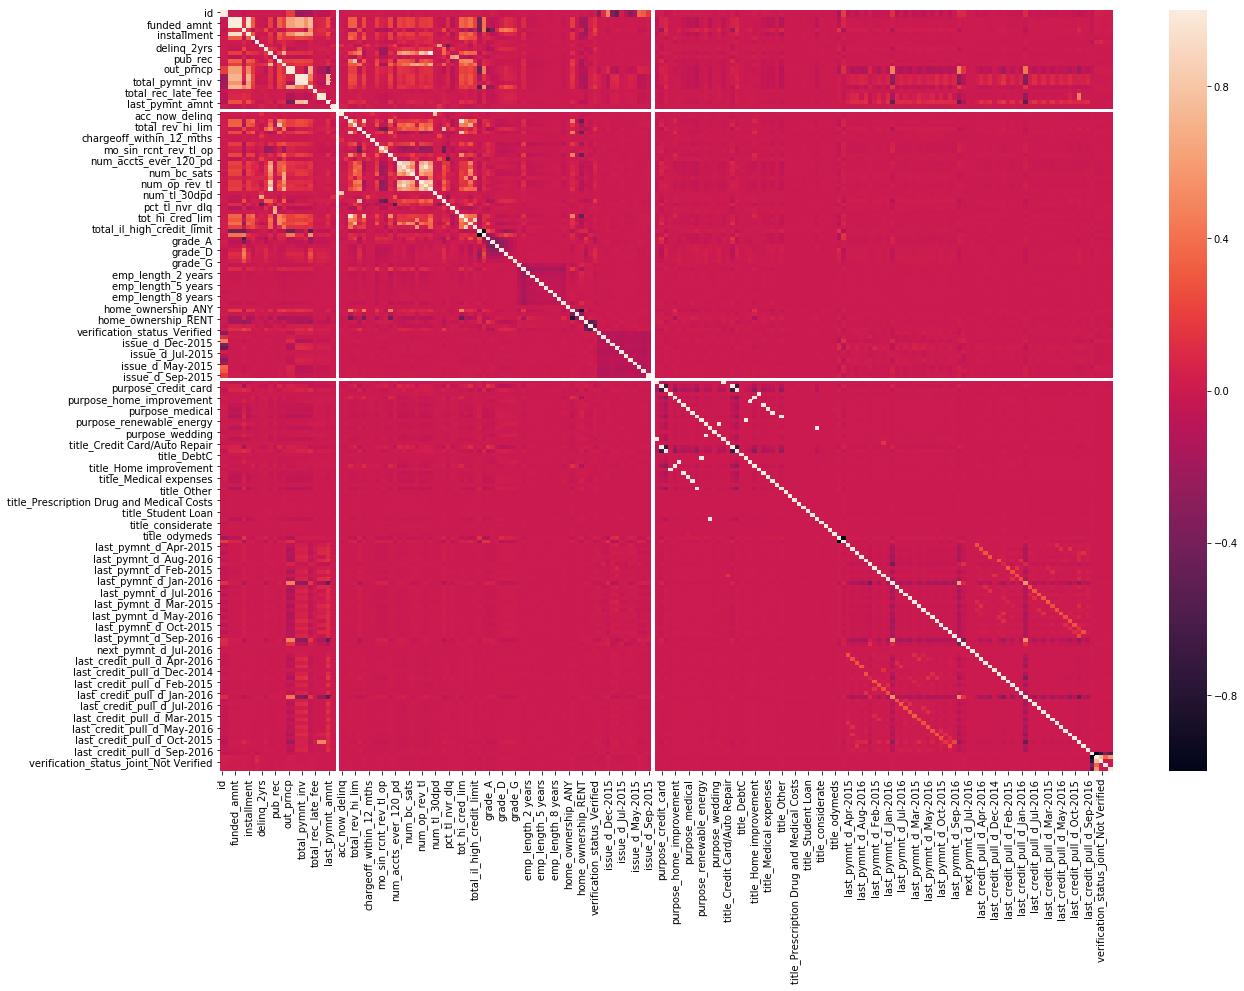

In [67]:
corrmat = X.corr()
sns.heatmap(corrmat)

In [82]:
corrmat

id  member_id  loan_amnt  \
id                                             1.000000   0.997540  -0.008288   
member_id                                      0.997540   1.000000  -0.008620   
loan_amnt                                     -0.008288  -0.008620   1.000000   
funded_amnt                                   -0.008288  -0.008620   1.000000   
funded_amnt_inv                               -0.008554  -0.008885   0.999994   
int_rate                                      -0.053402  -0.053447   0.140572   
installment                                   -0.012919  -0.013274   0.941205   
annual_inc                                     0.015055   0.014958   0.305734   
dti                                            0.005692   0.005806   0.006103   
delinq_2yrs                                    0.002300   0.002261  -0.010424   
inq_last_6mths                                 0.000660   0.000715  -0.039040   
open_acc                                       0.006309   0.006111   0.188214   
pub_rec                                        0.003501   0.003635  -0.088899   
revol_bal                                      0.003774   0.003745   0.334656   
total_acc                                     -0.014479  -0.014673   0.208430   
out_prncp                                      0.192187   0.191883   0.623926   
out_prncp_inv                                  0.192058   0.191755   0.623961   
total_pymnt                                   -0.219883  -0.219945   0.706184   
total_pymnt_inv                               -0.220078  -0.220139   0.706157   
total_rec_prncp                               -0.188353  -0.188443   0.556266   
total_rec_int                                 -0.165885  -0.165861   0.736585   
total_rec_late_fee                            -0.015779  -0.015748   0.051888   
recoveries                                    -0.070027  -0.069799   0.077870   
collection_recovery_fee                       -0.070594  -0.070372   0.079190   
last_pymnt_amnt                               -0.068844  -0.068974   0.259864   
collections_12_mths_ex_med                     0.011953   0.011891  -0.027454   
policy_code                                         NaN        NaN        NaN   
acc_now_delinq                                -0.004834  -0.004732   0.000645   
tot_coll_amt                                   0.002312   0.002329  -0.021437   
tot_cur_bal                                    0.011241   0.010903   0.325352   
total_rev_hi_lim                               0.019249   0.019148   0.330877   
acc_open_past_24mths                           0.015502   0.015281  -0.010114   
avg_cur_bal                                    0.007556   0.007317   0.238156   
chargeoff_within_12_mths                       0.001075   0.000655  -0.005382   
delinq_amnt                                    0.001961   0.001977  -0.002096   
mo_sin_old_rev_tl_op                           0.004593   0.004731   0.183754   
mo_sin_rcnt_rev_tl_op                          0.009478   0.009476   0.066548   
mo_sin_rcnt_tl                                -0.005305  -0.005469   0.041686   
mort_acc                                      -0.013036  -0.013261   0.231574   
num_accts_ever_120_pd                         -0.006172  -0.006180  -0.057356   
num_actv_bc_tl                                -0.006015  -0.005916   0.212990   
num_actv_rev_tl                               -0.014951  -0.014976   0.164565   
num_bc_sats                                    0.008984   0.008889   0.222171   
num_bc_tl                                     -0.028205  -0.028132   0.203509   
num_il_tl                                      0.000665   0.000371   0.074857   
num_op_rev_tl                                 -0.000275  -0.000317   0.174867   
num_rev_tl_bal_gt_0                           -0.013698  -0.013587   0.166295   
num_sats                                       0.005433   0.005237   0.189328   
num_tl_30dpd                                  -0.000488  -0.000406   0.002461   
num

In [0]:
# select the non dummy columns
df_1 = X[X.columns[:58]]

In [108]:
df_1.head()

id   member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  68009401.0  72868139.0    16000.0      16000.0          16000.0     14.85   
1  68354783.0  73244544.0     9600.0       9600.0           9600.0      7.49   
2  68466916.0  73356753.0    25000.0      25000.0          25000.0      7.49   
3  68466961.0  73356799.0    28000.0      28000.0          28000.0      6.49   
4  68495092.0  73384866.0     8650.0       8650.0           8650.0     19.89   

   installment  annual_inc    dti  delinq_2yrs  inq_last_6mths  open_acc  \
0       379.39     48000.0  33.18          0.0             0.0      11.0   
1       298.58     60000.0  22.44          0.0             0.0       7.0   
2       777.55    109000.0  26.02          0.0             1.0       9.0   
3       858.05     92000.0  21.60          0.0             0.0      16.0   
4       320.99     55000.0  25.49          0.0             4.0      18.0   

   pub_rec  revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0      2.0    19108.0       19.0   13668.88       13668.88      4519.68   
1      0.0     7722.0        9.0    6635.69        6635.69      3572.97   
2      0.0    20862.0       19.0       0.00           0.00     26224.23   
3      0.0    51507.0       24.0   19263.77       19263.77     10271.36   
4      1.0     9568.0       19.0       0.00           0.00      9190.49   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          4519.68          2331.12        2188.56                 0.0   
1          3572.97          2964.31         608.66                 0.0   
2         26224.23         25000.00        1224.23                 0.0   
3         10271.36          8736.23        1535.13                 0.0   
4          9190.49          8650.00         540.49                 0.0   

   recoveries  collection_recovery_fee  last_pymnt_amnt  \
0         0.0                      0.0           379.39   
1         0.0                      0.0           298.58   
2         0.0                      0.0         20807.39   
3         0.0                      0.0           858.05   
4         0.0                      0.0          8251.42   

   collections_12_mths_ex_med  policy_code  acc_now_delinq  tot_coll_amt  \
0                         0.0          1.0             0.0           0.0   
1                         0.0          1.0             0.0           0.0   
2                         0.0          1.0             0.0           0.0   
3                         0.0          1.0             0.0           0.0   
4                         0.0          1.0             0.0           0.0   

   tot_cur_bal  total_rev_hi_lim  acc_open_past_24mths  avg_cur_bal  \
0      31329.0          284700.0                   6.0       2848.0   
1      55387.0           13000.0                   2.0       7912.0   
2     305781.0           38400.0                   2.0      33976.0   
3     221110.0           79900.0                   1.0      13819.0   
4      18926.0           20750.0                  17.0       1051.0   

   chargeoff_within_12_mths  delinq_amnt  mo_sin_old_rev_tl_op  \
0                       0.0          0.0                 294.0   
1                       0.0          0.0                  91.0   
2                       0.0          0.0                 168.0   
3                       0.0          0.0                 379.0   
4                       0.0          0.0                  95.0   

   mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  num_accts_ever_120_pd  \
0                   11.0             6.0       2.0                    2.0   
1                    9.0             9.0       0.0                    0.0   
2                   13.0            13.0       3.0                    0.0   
3                   19.0            19.0       2.0                    0.0   
4                    0.0             0.0       0.0                    0.0   

   num_actv_bc_tl  num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  \
0    

In [0]:
# Drop more features 
df_1 = df_1.drop(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'policy_code'], axis=1)

In [0]:
corrmat = df_1.corr()

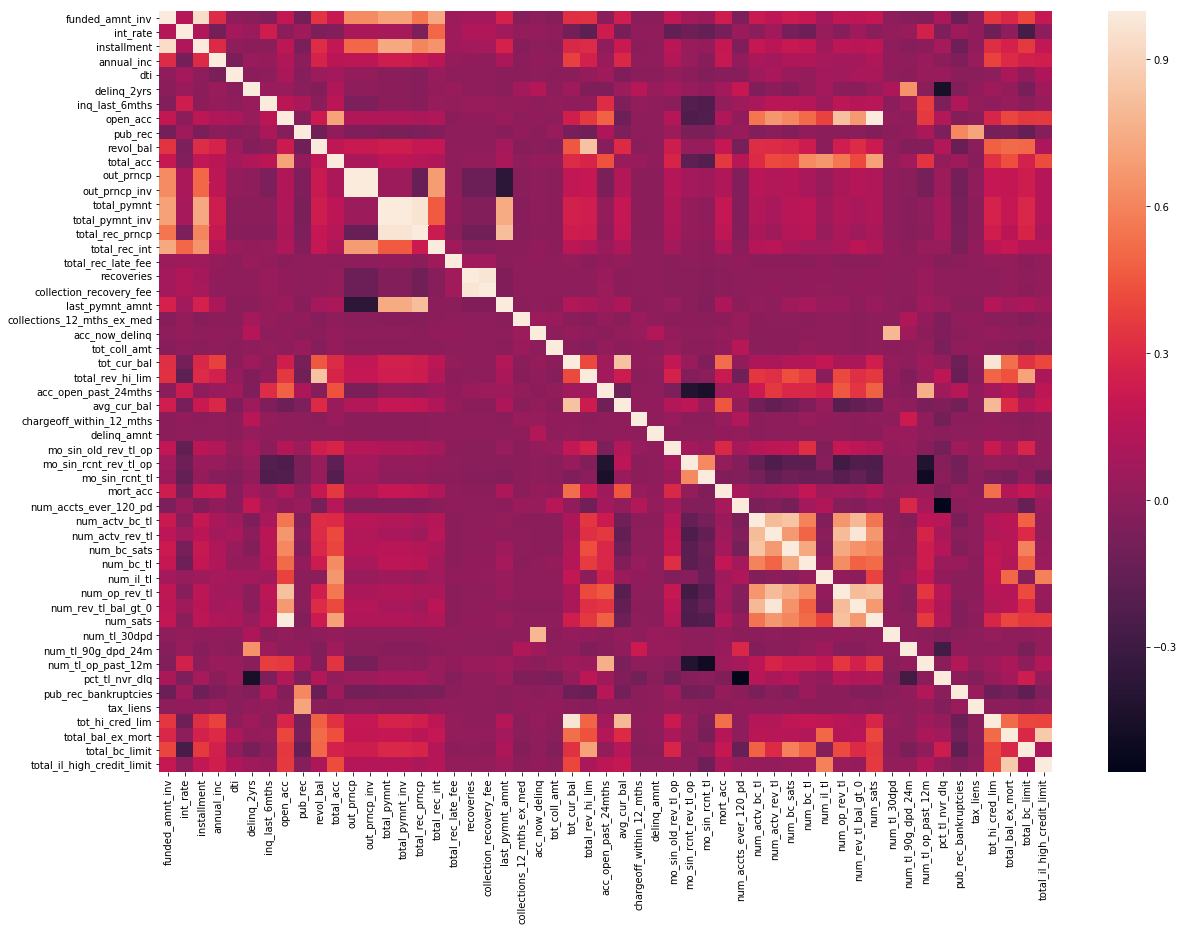

In [114]:
sns.heatmap(corrmat)

In [115]:
corrmat

funded_amnt_inv  int_rate  installment  \
funded_amnt_inv                    1.000000  0.140209     0.941187   
int_rate                           0.140209  1.000000     0.124426   
installment                        0.941187  0.124426     1.000000   
annual_inc                         0.305803 -0.090399     0.297393   
dti                                0.006044  0.077932     0.001893   
delinq_2yrs                       -0.010448  0.043710    -0.002129   
inq_last_6mths                    -0.039103  0.231139    -0.006255   
open_acc                           0.188212 -0.012985     0.169995   
pub_rec                           -0.088885  0.058231    -0.073399   
revol_bal                          0.334664 -0.057412     0.314090   
total_acc                          0.208464 -0.040211     0.183509   
out_prncp                          0.623858  0.106315     0.506732   
out_prncp_inv                      0.623899  0.106081     0.506745   
total_pymnt                        0.706259  0.087256     0.732579   
total_pymnt_inv                    0.706239  0.087028     0.732545   
total_rec_prncp                    0.556377 -0.057379     0.608280   
total_rec_int                      0.736483  0.504617     0.654990   
total_rec_late_fee                 0.051861  0.063685     0.063739   
recoveries                         0.077869  0.119825     0.082061   
collection_recovery_fee            0.079186  0.123180     0.084164   
last_pymnt_amnt                    0.259878  0.069755     0.264130   
collections_12_mths_ex_med        -0.027480  0.019234    -0.022146   
acc_now_delinq                     0.000630  0.027495     0.004108   
tot_coll_amt                      -0.021435  0.009697    -0.016802   
tot_cur_bal                        0.325401 -0.087011     0.295468   
total_rev_hi_lim                   0.330958 -0.174886     0.303476   
acc_open_past_24mths              -0.010221  0.228782     0.010295   
avg_cur_bal                        0.238198 -0.081874     0.215902   
chargeoff_within_12_mths          -0.005397  0.011913    -0.002996   
delinq_amnt                       -0.002097  0.009647    -0.000760   
mo_sin_old_rev_tl_op               0.183840 -0.160134     0.158800   
mo_sin_rcnt_rev_tl_op              0.066593 -0.122028     0.047059   
mo_sin_rcnt_tl                     0.041750 -0.150179     0.027120   
mort_acc                           0.231630 -0.076131     0.202128   
num_accts_ever_120_pd             -0.057389  0.044632    -0.045646   
num_actv_bc_tl                     0.212987 -0.018758     0.202271   
num_actv_rev_tl                    0.164525  0.066422     0.161092   
num_bc_sats                        0.222211 -0.083299     0.208238   
num_bc_tl                          0.203576 -0.115968     0.186971   
num_il_tl                          0.074842  0.033268     0.056563   
num_op_rev_tl                      0.174879 -0.022543     0.164643   
num_rev_tl_bal_gt_0                0.166253  0.063938     0.161079   
num_sats                           0.189325 -0.014050     0.170649   
num_tl_30dpd                       0.002448  0.021897     0.005279   
num_tl_90g_dpd_24m                -0.031349  0.031344    -0.024302   
num_tl_op_past_12m                -0.042263  0.256831    -0.010656   
pct_tl_nvr_dlq                     0.105096 -0.061652     0.085217   
pub_rec_bankruptcies              -0.124394  0.065078    -0.112663   
tax_liens                          0.002070  0.012234     0.010279   
tot_hi_cred_lim                    0.347355 -0.121081     0.315373   
total_bal_ex_mort                  0.289554 -0.000676     0.265224   
total_bc_limit                     0.395973 -0.257222     0.358718   
total_il_high_credit_limit         0.203085  0.004055     0.181215   

                            annual_inc       dti  delinq_2yrs  inq_last_6mths  \
funded_amnt_inv               0.305803  0.006044    -0.010448       -0.039103   
int_rate                     -0.090399  0.077932     0.043710        0.231139   
inst

In [0]:
# select more features with high covarience to remove
df_1_1 = df_1.drop(['out_prncp_inv', 'total_pymnt_inv', 'collection_recovery_fee'], axis=1)

In [118]:
df_1_1.shape

(421095, 50)

In [0]:
# scale the data
scaler = StandardScaler()

In [0]:
scaled_data = scaler.fit_transform(df_1_1)

In [0]:
pca = PCA(n_components=20)
x_pca = pca.fit_transform(scaled_data)

In [130]:
score = cross_val_score(rfc, x_pca, y, cv=10)
print(score)
print(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.89748522 0.90135594 0.90270951 0.90308945 0.90460698 0.90508193
 0.90469971 0.89947517 0.90464768 0.89790054]
0.9021052127284696
